In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [191]:
import plotly.express as px
import plotly.graph_objects as go

In [192]:
%matplotlib inline

In [174]:
df_hotel= pd.read_csv('hotel_bookings.csv')
df_hotel.head(5)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [175]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Missing Value Analysis

In [176]:
df_hotel.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

There are four columns with null values: children,country,agent,company

In [177]:
def missing_value_table(df):
    #total missing values
    missing_val= df.isnull().sum()
    #percentage of missing values
    missing_val_percent = (df.isnull().sum()/len(df))*100
    # Make a table with the results
    missing_val_table = pd.concat([missing_val,missing_val_percent],axis=1)
    
    missing_val_table_ren_cols = missing_val_table.rename(columns={0:'Missing Values',1:'% Total Values'})
    # Sort the table by percentage of missing descending
    missing_val_table_ren_cols= missing_val_table_ren_cols[missing_val_table_ren_cols.iloc[:,1]!=0].sort_values('% Total Values',ascending=False).round(1)
    
    print('Your selected dataframe has '+ str(df.shape[1]) +' columns.\n There are '+ str(missing_val_table_ren_cols.shape[0]) +' columns that have missing values')
    
    return missing_val_table_ren_cols
        
    
    


In [178]:
df_hotel_missing= missing_value_table(df_hotel)
df_hotel_missing

Your selected dataframe has 32 columns.
 There are 4 columns that have missing values


Missing Values  % Total Values
company           112593            94.3
agent              16340            13.7
country              488             0.4
children               4             0.0

We can drop Company column as more than 90% of data is missing

In [59]:
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [179]:
df_hotel.drop('company',axis=1,inplace=True)
df_hotel.shape

(119390, 31)

In [180]:
df_hotel[['agent','country','children']]

agent country  children
0         NaN     PRT       0.0
1         NaN     PRT       0.0
2         NaN     GBR       0.0
3       304.0     GBR       0.0
4       240.0     GBR       0.0
...       ...     ...       ...
119385  394.0     BEL       0.0
119386    9.0     FRA       0.0
119387    9.0     DEU       0.0
119388   89.0     GBR       0.0
119389    9.0     DEU       0.0

[119390 rows x 3 columns]

In [181]:
#Dropping null values from these columns as they have few missing values
df_hotel.dropna(subset=['country'],inplace=True)
df_hotel.dropna(subset=['children'],inplace=True)


In [182]:
df_hotel['agent'].fillna(0.0, inplace=True)

In [183]:
df_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [184]:
df_hotel.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   booking_changes  deposit_type  agent days_in_waiting_list customer_type  \
0                3    No Deposit    0.0                    0     Transient   
1                4    No Deposit    0.0                    0     Transient   
2                0    No Deposit    0.0                    0     Transient   
3                0    No Deposit  304.0                    0     Transient   
4                0    No Deposit  240.0                    0     Transient   

    adr  required_car_parking_spaces  total_of_special_requests  \
0   0.0                            0                          0   
1   0.0                            0                          0   
2  75.0                            0                          0   
3  75.0                            0                          0   
4  98.0                            0                          1   

   reservation_status reservation_status_date  
0           Check-Out              2015-07-01  
1           Check-Out              2015-07-01  
2           Check-Out              2015-07-02  
3           Check-Out              2015-07-02  
4           Check-Out              2015-07-03  

[5 rows x 31 columns]

## Univariate Analysis 

In [185]:
df_hotel['hotel'].value_counts()

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

In [193]:
fig=px.pie(df_hotel,'hotel',title='Hotel Types')
fig.show()

The above chart shows that majority of bookings were made for City Hotels.This could be because of cheaper rates of City Hotels than Resort.

Text(0.5, 1.0, 'Bookings per month')

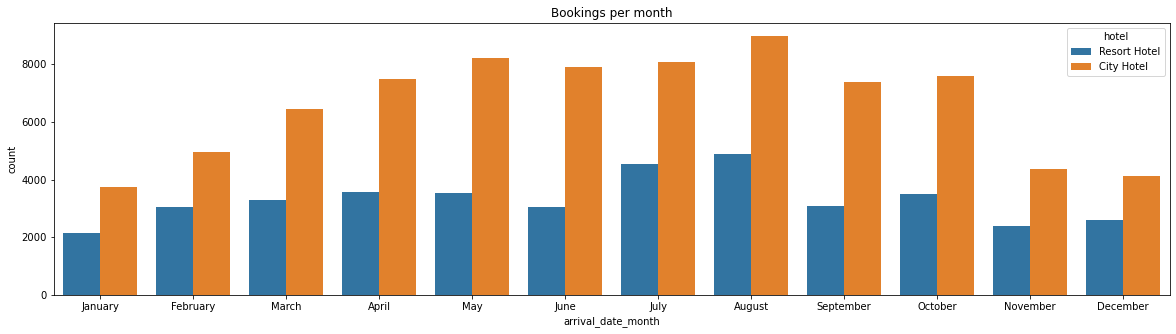

In [107]:
plt.figure(figsize=(20,5))
sns.countplot(x='arrival_date_month',data=df_hotel,hue='hotel',order=['January','February','March','April',
                                                                      'May','June','July','August','September',
                                                                      'October','November','December'])
plt.title('Bookings per month')

August month has the highest booking for both hotel types whereas winter months(Nov-Jan) has lowest bookings.

In [109]:
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [110]:
df_hotel[['adults','children','babies']]

adults  children  babies
0            2       0.0       0
1            2       0.0       0
2            1       0.0       0
3            1       0.0       0
4            2       0.0       0
...        ...       ...     ...
119385       2       0.0       0
119386       3       0.0       0
119387       2       0.0       0
119388       2       0.0       0
119389       2       0.0       0

[118898 rows x 3 columns]

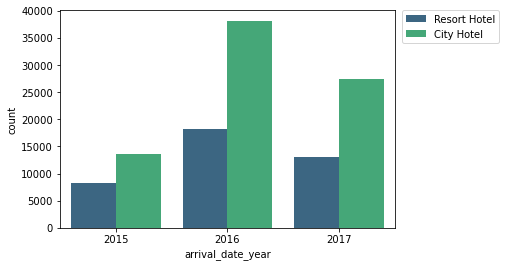

In [128]:
#df_hotel['arrival_date_year'].value_counts()
sns.countplot(x='arrival_date_year',data=df_hotel,hue='hotel',palette='viridis')
#to relocate the legend
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

The above chart shows that there has been more bookings for both the hotel types in 2016.

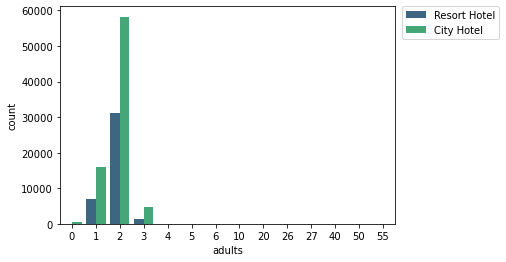

In [205]:
sns.countplot(x='adults',data=df_hotel,hue='hotel',palette='viridis')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

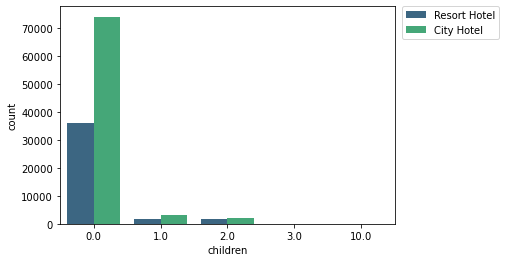

In [131]:
sns.countplot(x='children',data=df_hotel,hue='hotel',palette='viridis')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

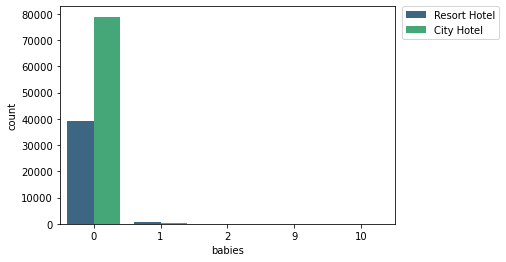

In [132]:
sns.countplot(x='babies',data=df_hotel,hue='hotel',palette='viridis')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

According to above charts, type of visitors mostly include adults/couples.<br/>
For both hotels, it is common for poeple to not bring children or babies along but if they do, at most 1-2 children or 1 baby. 

In [136]:
df_hotel['meal'].value_counts()

BB           91863
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

In [198]:
meal_type = {"BB": 'BB', "HB": "HB", "SC": 'No Meals',"Undefined":'No Meals',"FB":'FB'}
df_hotel['Meal_tp'] = df_hotel['meal'].map(meal_type)

In [200]:
df_hotel['Meal_tp'].value_counts()

BB          91863
HB          14434
No Meals    11803
FB            798
Name: Meal_tp, dtype: int64

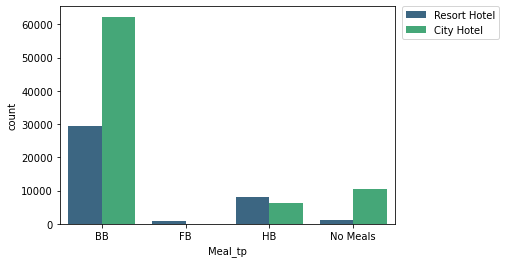

In [201]:
sns.countplot(x='Meal_tp',data=df_hotel,hue='hotel',palette='viridis')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Type of meal booked. Categories are presented in standard hospitality meal packages<br/>
BB: Bed & Breakfast.<br/>
HB: Half Board (Breakfast and Dinner normally)<br/>
FB: Full Board (Beakfast, Lunch and Dinner)<br/>
Undefined/SC – no meal

<AxesSubplot:xlabel='adr', ylabel='Count'>

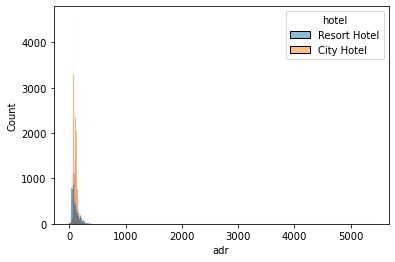

In [207]:
sns.histplot(x='adr',data=df_hotel,hue='hotel')

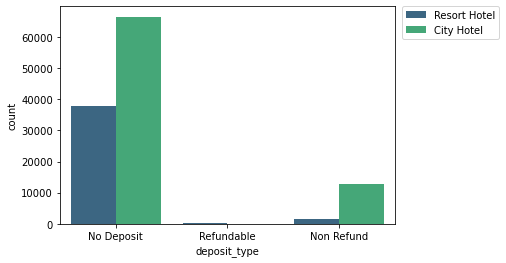

In [209]:
sns.countplot(x='deposit_type',data=df_hotel,hue='hotel',palette='viridis')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Meal_tp'],
      dtype='object')